# NoteBook 2 - NLP & Models
# Objective
To automatically categorize/tag TED Talk videos and **identify key topics/trends based on a series of features provided** in a sample dataset, link below.
Once the text data has been cleaned and prepared, a series Classification models will be trained on the sample dataset.

There are two datasets provided: the main summary and the transcripts

**TED Talks: Summary**
https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv

**TED Talks: Transcripts**
https://www.kaggle.com/rounakbanik/ted-talks?select=transcripts.csv

# Problem Statement

**The data provided, in its raw format, does not make for easy classification and statistical analysis of the various TED Talks**.  There is no easy way to decipher trends in popular talk topics, categories, or to further explore specific speakers, their occupations, and general talk focus (transcript summary).

# Benefit of Analysis

Being able to peel back  and examine various layers of details within the dataset to **isolate key trends, categories, or any other features of interest would be beneficial to the analyst/user** in answering a series of questions, often addressed by some of the best and brightest minds in the world and their respective TED talks.  

Being able to quickly classify and assign a given TED talk, based on other similar feature patterns, would allow for **improved viewer experiences from accurate user preference alignment as it relates to Tags, Ratings, and Comment popularity (counts)**.

## Data Provided - Summary:

- **Comments:** The number of first level comments made on the talk
- **Description:** A blurb of what the talk is about
- **Duration:** The duration of the talk in seconds
- **Event:** The TED/TEDx event where the talk took place
- **Film_date:** The Unix timestamp of the filming
- **Languages:** The number of languages in which the talk is available
- **Main_speaker:** The first named speaker of the talk
- **Name:** The official name of the TED Talk; includes the title and the speaker
- **Num_speaker:** The number of speakers in the talk
- **Published_date:** The Unix timestamp for the publication of the talk on TED.com
- **Ratings:** Groups of ratings assigned to each talk
- **Related_talks:** Similar talks/links
- **Speaker_occupation:** Primary speaker occupation/focus
- **Tags:** Tags assigned to the talk
- **Title:** Title of TED talk
- **Url:** The URL of the talk
- **Views:** Total views for talk

## Data Provided - Transcript:
- **Transcript:** The official English transcript of the talk
- **URL:** The URL of the talk

In [1]:
# Import neccessary libaries

import pandas as pd # Dataframes
pd.options.display.max_colwidth = 100 # Set the limit larger (100) to see full string details (Title names, etc.)

import numpy as np # Arrays and Math

# Pandas Profiling Summary report
from pandas_profiling import profile_report

# Visual libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# set plt inline so plots will automatically run without the .show() command
%matplotlib inline 

# Warnings set to Ignore messages
import warnings
warnings.filterwarnings('ignore')

# Statistical Summary
import statsmodels.formula.api as smf # Statsmodel OLS Summary for Regression Analysis

# Natural Language Processing (NLP)
import string 
import re # RegEX library for specific text isolation

from nltk.tokenize import sent_tokenize, word_tokenize # Tokenize sentences, then words with NLTK
from nltk.corpus import stopwords # Remove stopwords (the, a, is, are, etc.)
from nltk.stem import PorterStemmer # Reduce words back to original base word stem
from nltk import FreqDist # Counts frequency of word distributions

import textstat # Library to count to calculate statistics from text, readability, complexity, etc.

import ast # Abstract Syntax Tree - to help identify and segment information (text) imbedded in lists/dictionaries, etc.

from wordcloud import WordCloud, STOPWORDS # Wordcloud summary function, with supporting StopWords removal

from collections import Counter # Counter function for word frequencies (top 10 etc.)

# Track Time for measuring processing time on different ML models/parameters
from time import time

# Machine Learning - Classification for NLP
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer # Assinges Counts/Scores in Text

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics # Various scoring metrics included (Accuracy, Precision, Recall, etc.)

from sklearn.preprocessing import LabelEncoder # Label encode target variable to numeric for ML purposes

from sklearn.model_selection import train_test_split # Split the dataset in Train/Test based on X/y splits determined

# Import Classification Models
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB # Naive Bayes models for distribution ML Classification
from sklearn.svm import SVC # Support Vector Classifier library - for SVM (Linear/RBF, etc.)

# Hyperparameter Tuning off Models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold # Use Cross-Validation with Stratified ratios

# Save and Reload Jupyter Notebook at Stages - Dill
import dill

## Reload Prior Session - Separate File for NLP & Modeling to Follow

In [2]:
# Load notebook here - avoid reloading entire notebook from prior session
dill.load_session('notebook_env.db')

# Natural Language Processing

It is worth **examining the most frequent words present in the Tags and Transcript columns**.
We may be able to determine key trends through the TED Talk platform.

A separate attempt will be made to **train various Classification models on the Transcript column with the goal of predicting, on test data, the resepctive Primary Tag (target) column**.

## Word Cloud - Tags

In [3]:
# Create a corpus (collection of texts) for entire Transcript column
tag_corpus = [' '.join(i) for i in TED_combined['Tags']]  # Using blanks with join pulls every word through the Tags column

# Establish Stop Words for removal/exclusion
stop_words = set(stopwords.words('english'))

tag_corpus = [i for i in tag_corpus if not i in stop_words] # Remove all Stop Words
tag_corpus = ' '.join(tag_corpus).lower() # Using blanks again to now combine each list line into 1 full corpus - make lowercase

# Count the total words in the Tags Corpus
len(tag_corpus)

179729

In [4]:
# Create Word Cloud for above Tag Corpus, eliminating any stopwords not important for Word Cloud summary
wordcloud_tags = WordCloud(stopwords = STOPWORDS, background_color = 'white', width = 2000, height = 2000).generate(tag_corpus)

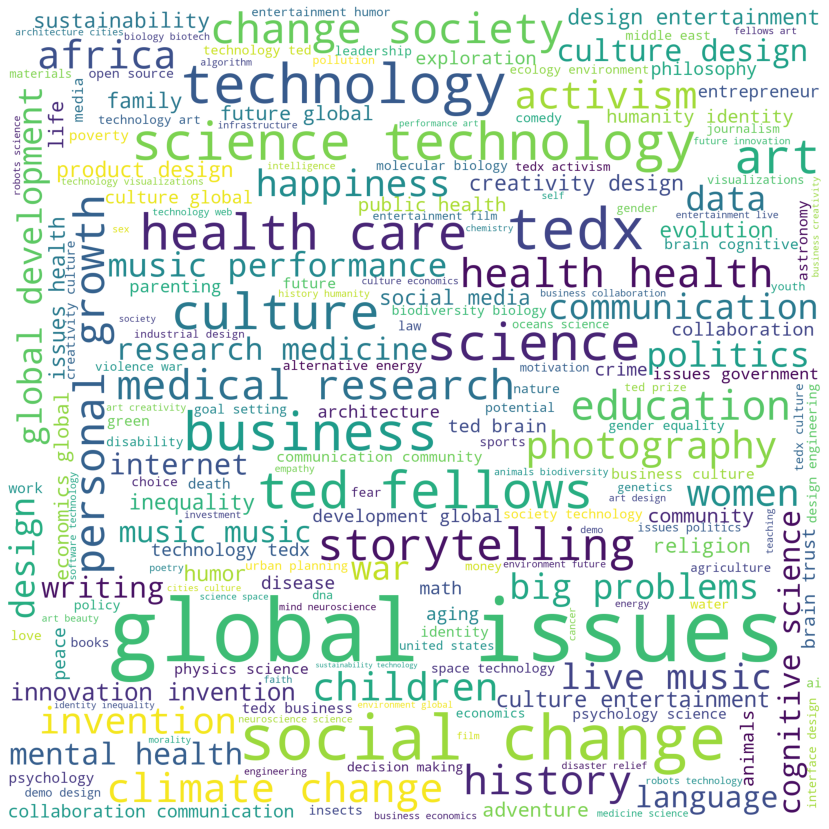

In [5]:
# Plot out the above Word Cloud as an image 
plt.figure(figsize = (25,15))
plt.imshow(wordcloud_tags)
plt.axis('off'); # Axes can be removed for images

In [6]:
# Create blank list and cycle through tokenizing/appending the respective word counts to the list
tag_counts = []

for t in word_tokenize(tag_corpus):
    tag_counts.append(t)

tag_counts = Counter(tag_counts) # User Counter library to count each word frequency

print("Top 15 Tags by Count:\n")
tag_counts.most_common(15)

# List comprehension/dict then make a bar chart for counts

Top 15 Tags by Count:



[('technology', 712),
 ('science', 654),
 ('global', 552),
 ('design', 514),
 ('issues', 490),
 ('health', 487),
 ('culture', 476),
 ('tedx', 418),
 ('business', 364),
 ('change', 302),
 ('entertainment', 287),
 ('art', 283),
 ('social', 266),
 ('ted', 249),
 ('biology', 227)]

In [7]:
top_tags = dict(tag_counts.most_common(15))
top_tags_keys = top_tags.keys()
top_tags_values = top_tags.values()

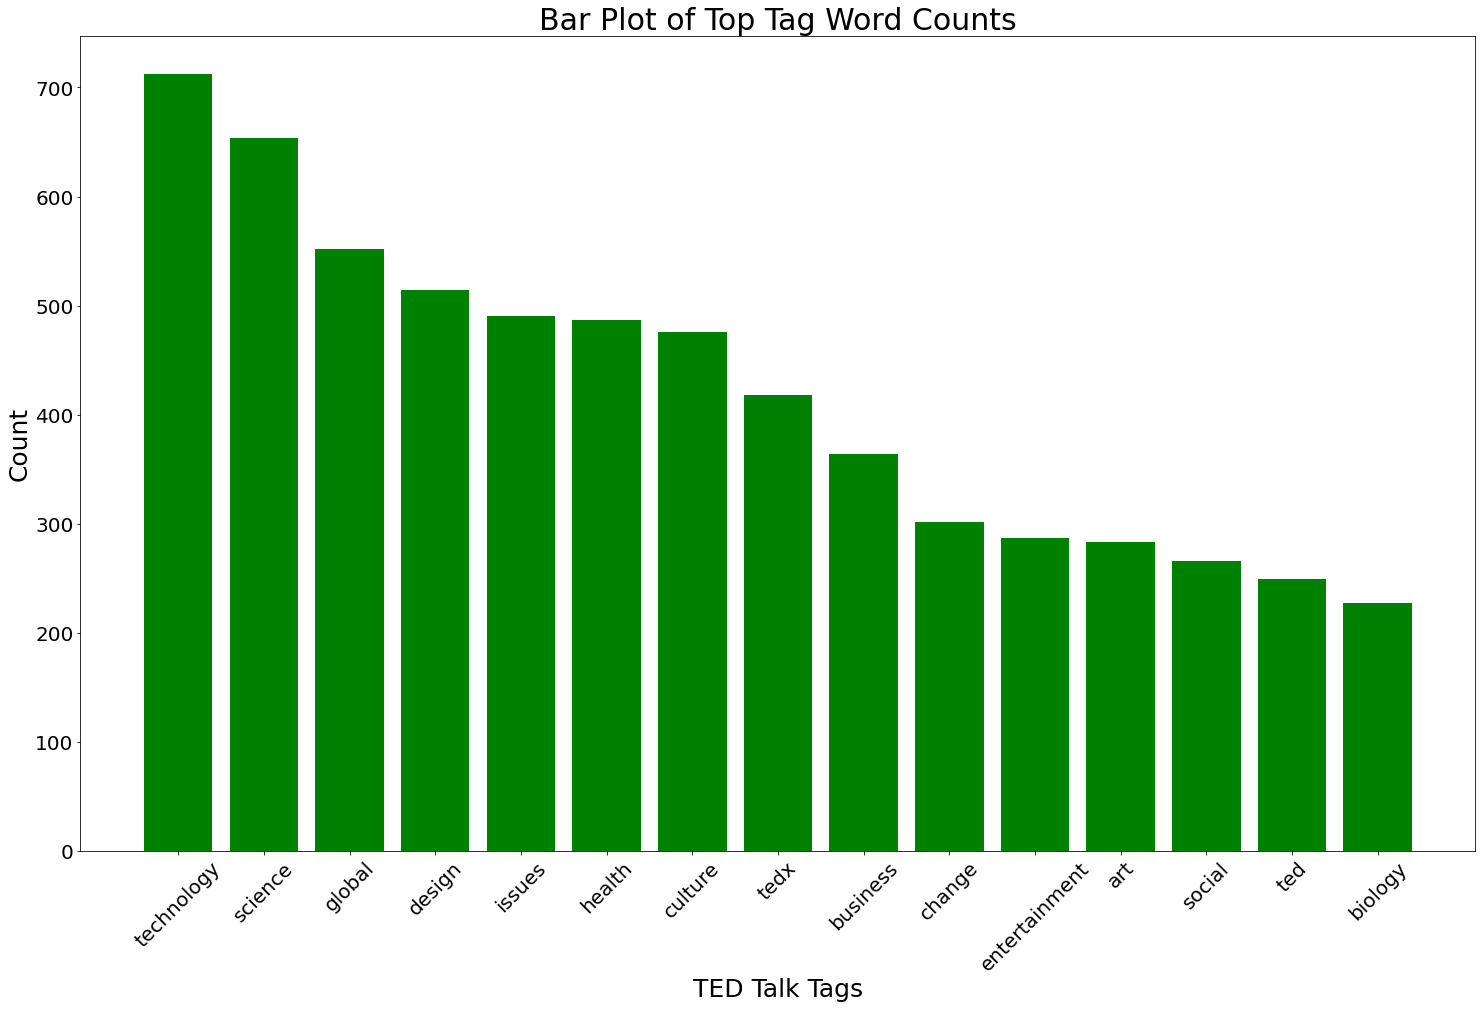

In [8]:
plt.figure(figsize = (25,15))
plt.bar(top_tags_keys, top_tags_values, color = 'green')

# Update Title and Axes
plt.title("Bar Plot of Top Tag Word Counts", fontdict = {'fontsize': 30})
plt.xlabel("TED Talk Tags", fontdict = {'fontsize': 25})
plt.ylabel("Count", fontdict = {'fontsize': 25})

# Adjust Axis Rotations & Sizes            
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20);

In [9]:
print("Summary of Key Tags (lowercase):\n")
print("Count for 'global issues': {}".format(tag_corpus.count('global issues')))
print("Count for 'social change': {}".format(tag_corpus.count('social change')))
print("Count for 'science technology': {}".format(tag_corpus.count('science technology')))
print("Count for 'ted fellows': {}".format(tag_corpus.count('ted fellows')))
print("Count for 'personal growth': {}".format(tag_corpus.count('personal growth')))
print("Count for 'medical research': {}".format(tag_corpus.count('medical research')))

Summary of Key Tags (lowercase):

Count for 'global issues': 490
Count for 'social change': 216
Count for 'science technology': 151
Count for 'ted fellows': 141
Count for 'personal growth': 95
Count for 'medical research': 91


- When looking at the most prevalent individual word tags, we can see that Technology, closely followed by Science are the top tags for all TED Talks
- When looking at top two-worded tags, Global Issues are the top tagged TED Talks
    - When browsing both single/double tags, we can **clearly see that Science, Technology, and Global Issues are key focal points for the large majority of TED Talks**

## Word Cloud - Transcripts

In [10]:
# Create a corpus (collection of texts) for entire Transcript column
transcript_corpus = ' '.join(TED_combined['Transcript']) # Using blanks with join pulls every word through the Transcript column
transcript_corpus = transcript_corpus.replace('. ', '.  ').lower() # Add a space after periods for cleaner viewing

# Count the total words in Transcript Corpus
len(transcript_corpus)

28457460

In [11]:
# Create Word Cloud for above Corpus, eliminating any stopwords not important for Word Cloud summary
wordcloud_transcript = WordCloud(stopwords = STOPWORDS, background_color = 'black', 
                                 width = 2000, height = 2000).generate(transcript_corpus) # Make all words lowercase

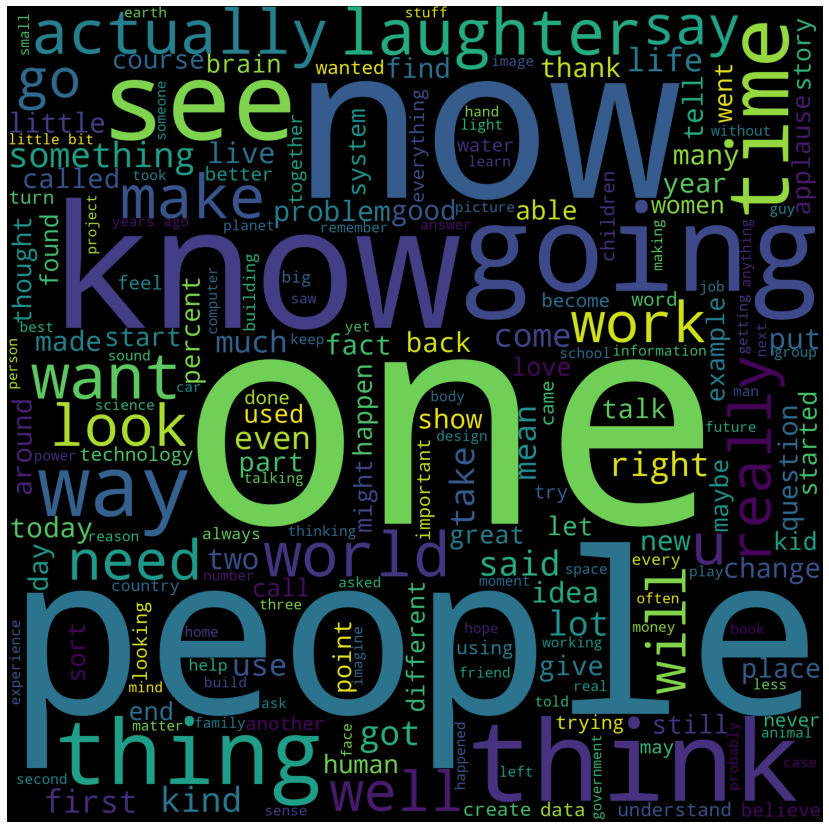

In [12]:
# Plot out the above Word Cloud as an image 
plt.figure(figsize = (25,15))
plt.imshow(wordcloud_transcript)
plt.axis('off'); # Axes can be removed for images

In [13]:
# Establish Stop Words for removal/exclusion
stop_words = set(stopwords.words('english'))

# Update the Regex for the words, removing punctuation
trans_corp_temp = re.sub('\W+',' ', transcript_corpus)

# Create a blank list for Transcript Corpus and tokenize each item, Regex adjusted, and append to list
trans_corpus = []

for t in word_tokenize(trans_corp_temp):
    trans_corpus.append(t)

# Separately remove further Stop Words (I, And, etc. in truncated Trans Corpus list)
trans_corpus_sw = [t for t in trans_corpus if not t in stop_words]

In [14]:
# Create blank list and cycle through tokenizing/appending the respective word counts to the list
transcript_counts = []

for t in trans_corpus_sw:
    transcript_counts.append(t)

# Apply counts to the total Transcript corpus for most frequent words (15) - Stopwords removed
transcript_counts = Counter(transcript_counts)
transcript_counts = transcript_counts.most_common(15)
transcript_counts

[('one', 20209),
 ('people', 19734),
 ('like', 19203),
 ('know', 13017),
 ('going', 12880),
 ('think', 12124),
 ('see', 11630),
 ('would', 11618),
 ('us', 11048),
 ('really', 11046),
 ('get', 10841),
 ('time', 10540),
 ('laughter', 10353),
 ('world', 10350),
 ('way', 9047)]

In [15]:
# Convert transcript counts to a Dictionary, manually removing select Stop Words provided below
trans_counts = dict(transcript_counts)
trans_counts_keys = trans_counts.keys()
trans_counts_values = trans_counts.values()

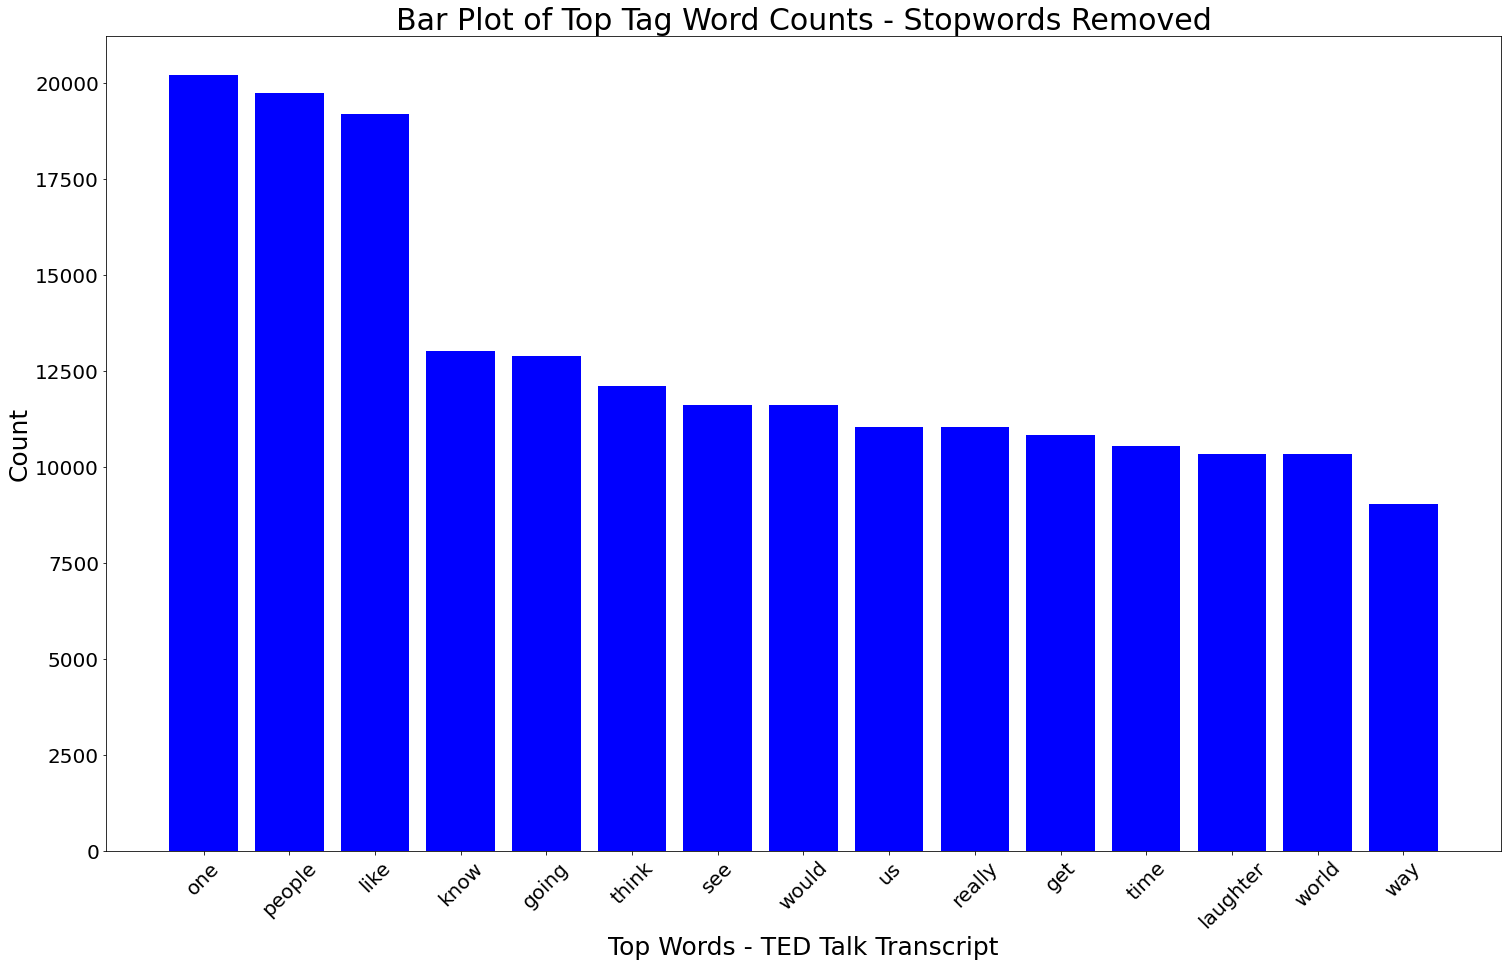

In [16]:
plt.figure(figsize = (25,15))
plt.bar(trans_counts_keys, trans_counts_values, color = 'blue')

# Update Title and Axes
plt.title("Bar Plot of Top Tag Word Counts - Stopwords Removed", fontdict = {'fontsize': 30})
plt.xlabel("Top Words - TED Talk Transcript", fontdict = {'fontsize': 25})
plt.ylabel("Count", fontdict = {'fontsize': 25})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20);

In [17]:
# Print summary, blended between Stop Word summary above and overall Transcript Corpus for most popular words in Word Cloud

print("Summary of, case-sensitive, Top Word Counts in Transcript:\n") 

# Pulled from main corpus as excluded from summary (Stop Word)
print("Count for 'now (Stop Word)': {}".format(transcript_corpus.count('now'))) # Included Stopword - not in Bar Plot above

# Pulled from dictionary of above, adjusted Stop Word, summary list of word counts
print("Count for 'one': {}".format(dict(transcript_counts)['one']))
print("Count for 'people': {}".format(dict(transcript_counts)['people']))
print("Count for 'know': {}".format(dict(transcript_counts)['know']))
print("Count for 'going': {}".format(dict(transcript_counts)['going']))
print("Count for 'think': {}".format(dict(transcript_counts)['think']))
print("Count for 'see': {}".format(dict(transcript_counts)['see']))
print("Count for 'laughter': {}".format(dict(transcript_counts)['laughter']))
print("Count for 'world': {}".format(dict(transcript_counts)['world']))

Summary of, case-sensitive, Top Word Counts in Transcript:

Count for 'now (Stop Word)': 32833
Count for 'one': 20209
Count for 'people': 19734
Count for 'know': 13017
Count for 'going': 12880
Count for 'think': 12124
Count for 'see': 11630
Count for 'laughter': 10353
Count for 'world': 10350


Based on the sizing of key words above, we can see that the following (ordered) are key words/ideas represented within the entire TED dataset:
- Now
- One
- People
- Know
- Going
- Think
- See
- Laughter
- World

These all **encapsulate an overall positive, humanity focused message**, which aligns well with the respective TED Message & Slogan: 
- Welcoming People of Every Discipline and Culture who Seek a Deeper Understanding of the World
- Ideas Worth Spreading

## Determining Most Predictive Words (Total Count & TFIDF Scores)

In [18]:
# Count Vectorizer - Single Words, in a Min of 5% and Max of 30% of documents
vect = CountVectorizer(stop_words = 'english', lowercase  = True,
                            ngram_range = (1, 1), min_df = .05, max_df = 0.30)  

vects = vect.fit_transform(TED_combined['Transcript'])

# Create a Term Document Matrix (DataFrame) of all feature names and counts (Doc# for each column)
td = pd.DataFrame(vects.todense())  
td.columns = vect.get_feature_names()

# Create a copy of td matrix as backup if needed
term_document_matrix = td.copy().T

term_document_matrix.columns = ['Doc '+ str(i) for i in range(0, (vects.shape[0]))]

# Add a Total Count column
term_document_matrix['Total_Count'] = term_document_matrix.sum(axis = 1)

# Rese the index as a column and rename to Document
term_document_matrix = term_document_matrix.reset_index()
term_document_matrix.rename({'index': 'Term'}, axis = 1, inplace = True)

# Name each row in Document column with Doc # for each line of Transcript
# term_document_matrix['Document'] = ['Doc '+ str(i) for i in range(0, (term_document_matrix['Document'].shape[0]))]

In [19]:
# Add in Primary Rating/# columns
term_document_matrix['Primary_Rating'] = TED_combined['Primary_Rating']
term_document_matrix['Primary_Rating_Num'] = TED_combined['Primary_Rating_Num']

# Examine the top 5 rows of Term Document Matrix
term_document_matrix.head()

,Term,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,...,Doc 2460,Doc 2461,Doc 2462,Doc 2463,Doc 2464,Doc 2465,Doc 2466,Total_Count,Primary_Rating,Primary_Rating_Num
0,100,0,0,0,0,3,3,0,1,1,...,2,0,1,0,0,0,0,1280,Inspiring,7
1,11,0,0,3,0,0,4,0,0,0,...,1,0,0,0,0,0,0,508,Funny,4
2,12,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,1,639,Funny,4
3,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,283,Inspiring,7
4,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,333,Informative,5


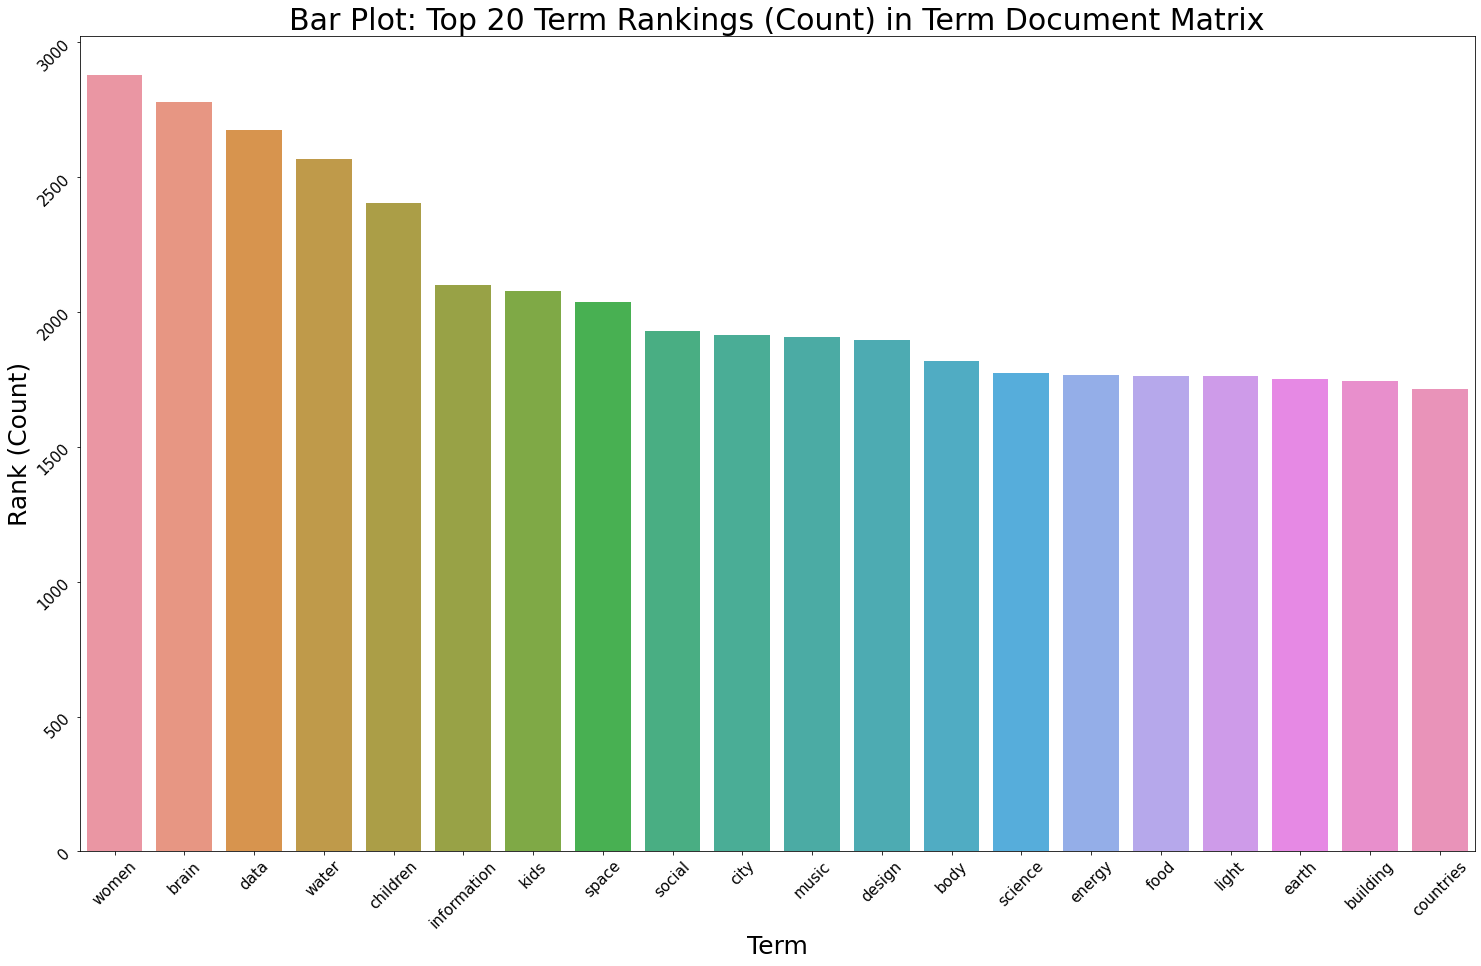

In [20]:
# Plot Barplot of Top 20 terms, by Total Count
plt.figure(figsize = (25,15))

# Create a top 20 terms ranking for Term Document Matrix
top_20_terms = term_document_matrix.sort_values(by = 'Total_Count', ascending = False).head(20)
sns.barplot(data = top_20_terms, x = 'Term', y = 'Total_Count');

# Update Title and Axes
plt.title("Bar Plot: Top 20 Term Rankings (Count) in Term Document Matrix", fontdict = {'fontsize': 30})
plt.xlabel('Term', fontdict = {'fontsize': 25})
plt.ylabel('Rank (Count)', fontdict = {'fontsize': 25});

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(rotation = 45, fontsize = 15);

**From an Overall Count standpoint**, certain keywords/ideas are most prevalent within the total Document Corpus in the Transcript column, including:
- **Humankind/Family**: Women, Children, Kids 
- **Science/Learning**: Brain, Data, Information, Science
- **World/Resources**: Water, Space, Energy, Food, Earth, City, Countries
- **Society**: Social, Music, Design, Building

In [21]:
# Extract vocabulary from Vectorizer model (Dictionary keys/values)
vocabulary = vect.vocabulary_

In [22]:
# Count Vectorizer - Single Words, in a Min of 5% and Max of 30% of documents
vect = TfidfVectorizer(stop_words = 'english', lowercase  = True,
                            ngram_range = (1, 1), min_df = .05, max_df = 0.30, vocabulary = vocabulary)   

vects = vect.fit_transform(TED_combined['Transcript'])

# Create a Term Document Matrix (DataFrame) of all feature names and counts (Doc# for each column)
td = pd.DataFrame(vects.todense())  
td.columns = vect.get_feature_names()

# Create a copy of td matrix as backup if needed
term_document_matrix = td.copy().T

term_document_matrix.columns = ['Doc '+ str(i) for i in range(0, (vects.shape[0]))]

# Add a Total Count column
term_document_matrix['Max_TF-IDF'] = term_document_matrix.max(axis = 1)

# Rese the index as a column and rename to Document
term_document_matrix = term_document_matrix.reset_index()
term_document_matrix.rename({'index': 'Term'}, axis = 1, inplace = True)

# Name each row in Document column with Doc # for each line of Transcript
# term_document_matrix['Document'] = ['Doc '+ str(i) for i in range(0, (term_document_matrix['Document'].shape[0]))]

In [23]:
# Add in Primary Rating/# columns
term_document_matrix['Primary_Rating'] = TED_combined['Primary_Rating']
term_document_matrix['Primary_Rating_Num'] = TED_combined['Primary_Rating_Num']

# Examine the top 5 rows of Term Document Matrix
term_document_matrix.head()

,Term,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,...,Doc 2460,Doc 2461,Doc 2462,Doc 2463,Doc 2464,Doc 2465,Doc 2466,Max_TF-IDF,Primary_Rating,Primary_Rating_Num
0,100,0.0,0.0,0.000000,0.0,0.043018,0.051869,0.0,0.016733,0.017232,...,0.043799,0.0,0.035935,0.0,0.0,0.0,0.000000,0.257694,Inspiring,7
1,11,0.0,0.0,0.072908,0.0,0.000000,0.091271,0.0,0.000000,0.000000,...,0.028902,0.0,0.000000,0.0,0.0,0.0,0.000000,0.212380,Funny,4
2,12,0.0,0.0,0.044826,0.0,0.000000,0.021043,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.029351,0.203592,Funny,4
3,13,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.264766,Inspiring,7
4,14,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.230807,Informative,5


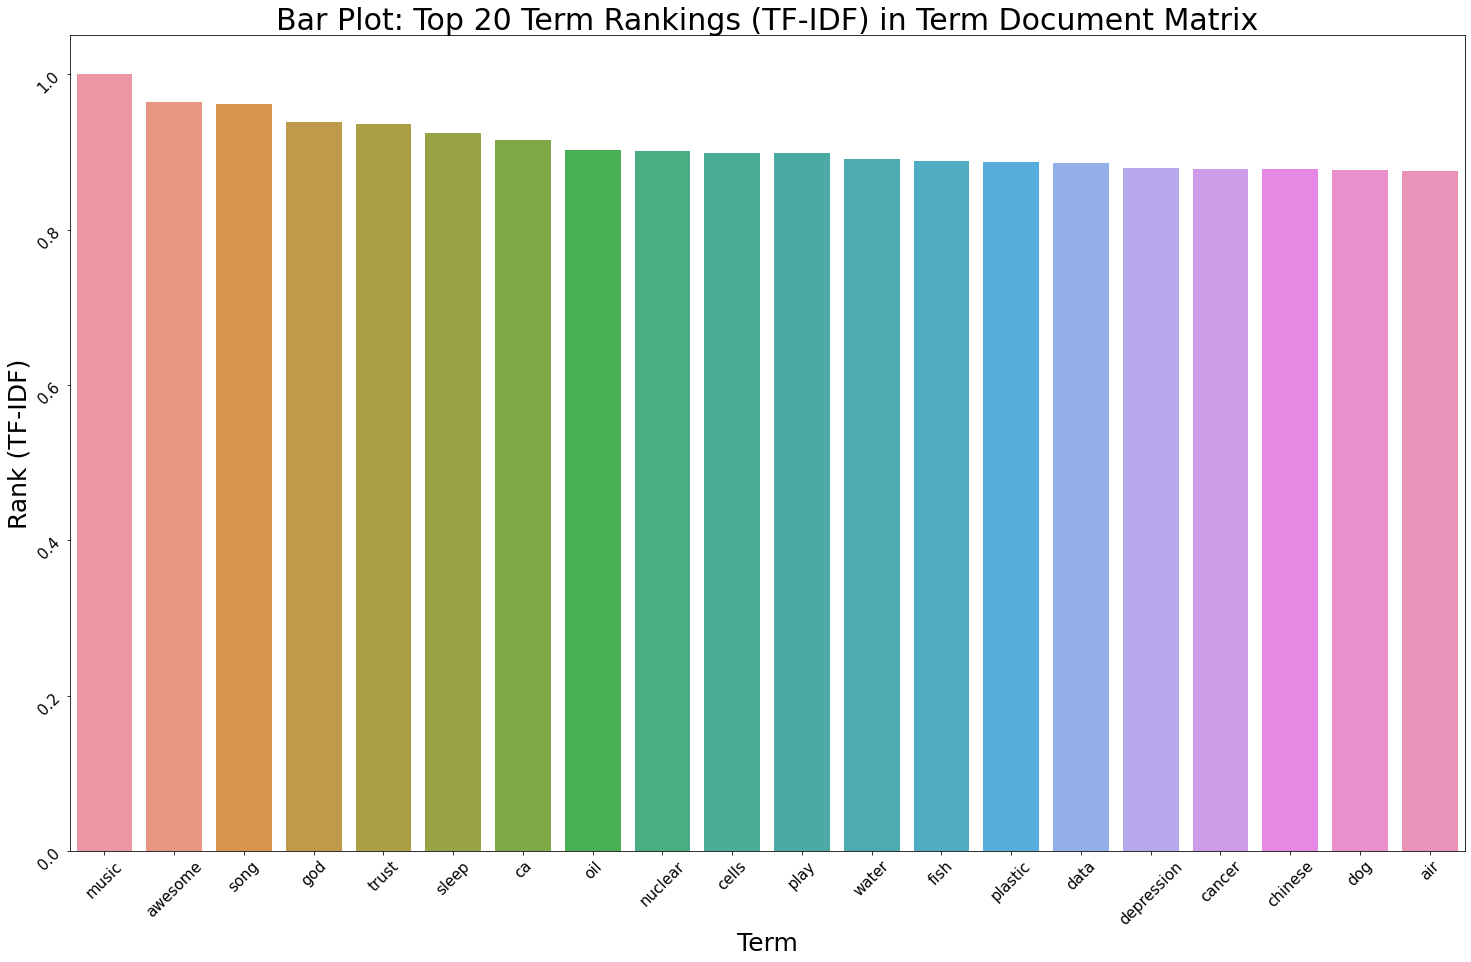

In [24]:
# Plot Barplot of Top 20 terms, by Max TFIDF Score
plt.figure(figsize = (25,15))

# Create a top 20 terms ranking for Term Document Matrix
top_20_terms = term_document_matrix.sort_values(by = 'Max_TF-IDF', ascending = False).head(20)
sns.barplot(data = top_20_terms, x = 'Term', y = 'Max_TF-IDF');

# Update Title and Axes
plt.title("Bar Plot: Top 20 Term Rankings (TF-IDF) in Term Document Matrix", fontdict = {'fontsize': 30})
plt.xlabel('Term', fontdict = {'fontsize': 25})
plt.ylabel('Rank (TF-IDF)', fontdict = {'fontsize': 25});

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(rotation = 45, fontsize = 15);

**From a maximum TF-IDF score standpoint**, certain keywords are most prevalent, however more randomized than when summarizing based on Total Counts, within the total Document Corpus in the Transcript column, including:
- **Musical**: Music, Song
- Awesome (description)
- God
- Trust
- Sleep
- Nuclear
- **Natural Resources**: Water, Fish, Air
- Data
- **Human Issues**: Depression, Cancer
- Chinese
- Dog

In [25]:
le = LabelEncoder()
term_num = le.fit_transform(term_document_matrix['Term'])

term_document_matrix.insert(1, 'Term_#', term_num)


term_document_matrix.head()

,Term,Term_#,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,...,Doc 2460,Doc 2461,Doc 2462,Doc 2463,Doc 2464,Doc 2465,Doc 2466,Max_TF-IDF,Primary_Rating,Primary_Rating_Num
0,100,0,0.0,0.0,0.000000,0.0,0.043018,0.051869,0.0,0.016733,...,0.043799,0.0,0.035935,0.0,0.0,0.0,0.000000,0.257694,Inspiring,7
1,11,1,0.0,0.0,0.072908,0.0,0.000000,0.091271,0.0,0.000000,...,0.028902,0.0,0.000000,0.0,0.0,0.0,0.000000,0.212380,Funny,4
2,12,2,0.0,0.0,0.044826,0.0,0.000000,0.021043,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.029351,0.203592,Funny,4
3,13,3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.264766,Inspiring,7
4,14,4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.230807,Informative,5


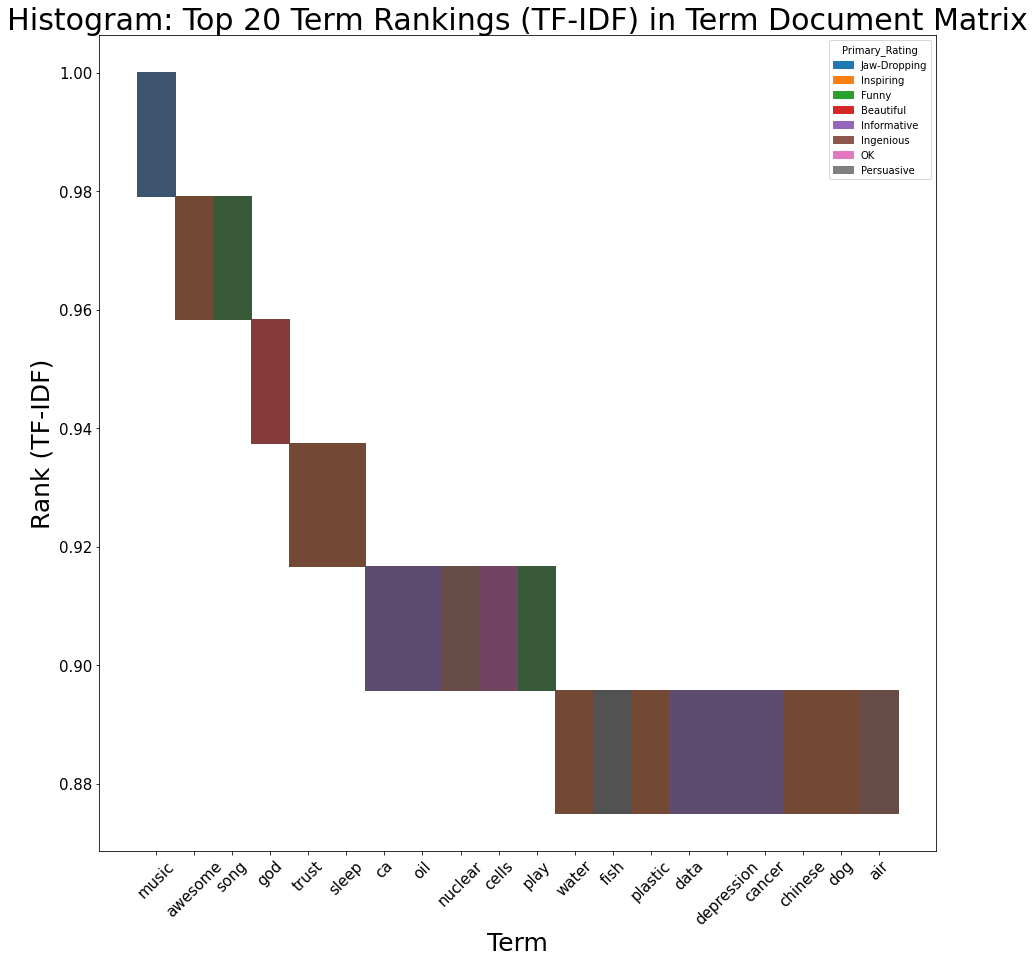

In [26]:
# Plot Barplot of Top 20 terms, by Max TFIDF Score
plt.figure(figsize = (15,15))

# Create a top 20 terms ranking for Term Document Matrix
top_20_terms = term_document_matrix.sort_values(by = 'Max_TF-IDF', ascending = False).head(20)
sns.histplot(data = top_20_terms, x = 'Term', y = 'Max_TF-IDF', hue = 'Primary_Rating');

# Update Title and Axes
plt.title("Histogram: Top 20 Term Rankings (TF-IDF) in Term Document Matrix", fontdict = {'fontsize': 30})
plt.xlabel('Term', fontdict = {'fontsize': 25})
plt.ylabel('Rank (TF-IDF)', fontdict = {'fontsize': 25});

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15);

Adding in the respective Primary Rating categories to the Term Document Matrix, we can see that the top predictive words (based on Maximum TF-IDF Scores) and respective Ratings:
- **Music (Jaw-Dropping)**
- Awesome (Ingenious)
- Song (Funny)
- God (Beautiful)
- Trust & Sleep (Ingenious)

## Building a Predictive Model on Text Vectors

### Initializing CountVectorizer & TFIDF Transformer

Since the CountVectorizer will be used first and fitted to the Transcript Corpus, only the TFIDF Transformer will be required for providing IDF values and then computing respective TFIDF scores.

In [27]:
# Initialize the CountVectorizer and fit to the Transcript column for single words in a Min of 10% of documents
vect = CountVectorizer(stop_words = 'english', min_df = .10, ngram_range = (1, 1))  
vects = vect.fit(TED_combined['Transcript'])

In [28]:
# Create a new matrix and transform the Transcript column
trans_matrix = vects.transform(TED_combined['Transcript'])

In [29]:
# Print summary of the 1st row of data - all words (word location and respective count)
print(trans_matrix[0])

  (0, 6)	1
  (0, 8)	1
  (0, 12)	1
  (0, 15)	2
  (0, 21)	2
  (0, 28)	6
  (0, 32)	1
  (0, 37)	1
  (0, 40)	1
  (0, 48)	4
  (0, 52)	2
  (0, 53)	2
  (0, 54)	1
  (0, 55)	2
  (0, 57)	1
  (0, 59)	1
  (0, 61)	1
  (0, 62)	2
  (0, 65)	1
  (0, 71)	1
  (0, 73)	1
  (0, 74)	2
  (0, 76)	1
  (0, 77)	3
  (0, 81)	1
  :	:
  (0, 861)	4
  (0, 862)	1
  (0, 864)	1
  (0, 865)	9
  (0, 866)	2
  (0, 867)	1
  (0, 869)	7
  (0, 870)	1
  (0, 873)	1
  (0, 874)	2
  (0, 875)	3
  (0, 876)	3
  (0, 878)	5
  (0, 879)	1
  (0, 881)	6
  (0, 885)	7
  (0, 888)	1
  (0, 889)	1
  (0, 890)	1
  (0, 891)	1
  (0, 894)	7
  (0, 895)	1
  (0, 896)	1
  (0, 897)	3
  (0, 898)	5


In [30]:
# Initialize & fit the TFIF Transformer and fit to the above vector - TFIDF scores will show for each row/word instead of count
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(trans_matrix)

# Create Rating TFIDF matrix for above count matrix
rating_tfidf = round(tfidf_transformer.transform(trans_matrix),4)
print(rating_tfidf[0])
print(rating_tfidf.shape)

  (0, 6)	0.0178
  (0, 8)	0.0147
  (0, 12)	0.0162
  (0, 15)	0.0334
  (0, 21)	0.0381
  (0, 28)	0.0583
  (0, 32)	0.0118
  (0, 37)	0.0217
  (0, 40)	0.0191
  (0, 48)	0.0312
  (0, 52)	0.0401
  (0, 53)	0.0405
  (0, 54)	0.014
  (0, 55)	0.0298
  (0, 57)	0.0202
  (0, 59)	0.0211
  (0, 61)	0.0244
  (0, 62)	0.0256
  (0, 65)	0.0173
  (0, 71)	0.0181
  (0, 73)	0.0239
  (0, 74)	0.0274
  (0, 76)	0.0118
  (0, 77)	0.0363
  (0, 81)	0.0127
  :	:
  (0, 861)	0.0642
  (0, 862)	0.0202
  (0, 864)	0.0167
  (0, 865)	0.0766
  (0, 866)	0.0293
  (0, 867)	0.0186
  (0, 869)	0.0873
  (0, 870)	0.0226
  (0, 873)	0.0232
  (0, 874)	0.0369
  (0, 875)	0.0543
  (0, 876)	0.0509
  (0, 878)	0.0984
  (0, 879)	0.018
  (0, 881)	0.0596
  (0, 885)	0.0629
  (0, 888)	0.0237
  (0, 889)	0.0213
  (0, 890)	0.0184
  (0, 891)	0.0202
  (0, 894)	0.1137
  (0, 895)	0.0198
  (0, 896)	0.0189
  (0, 897)	0.0325
  (0, 898)	0.0437
(2467, 903)


### Train & Validate (Test) Models on Data

#### Split the data into X and y (Target)

In [31]:
X = rating_tfidf
y = TED_combined['Primary_Rating']

# Print Summary of X and Y to confirm splits as intended
print('Dataset Shapes:\n')
print('DataFrame:', TED_combined.shape)
print('X Shape:', X.shape)
print('y Shape:', y.shape)

Dataset Shapes:

DataFrame: (2467, 37)
X Shape: (2467, 903)
y Shape: (2467,)


#### Split the datasets into Training & Validation
The Testing dataset will remain separate so as to **avoid Data Leakage**.

In [32]:
# First split the data into Temp and Test, using test size of .20, random state kept at 1, and stratify to copy y proportions
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = .20, random_state = 1, stratify = y)

# Second split the data into Train and Validation (Val) using test size of .25 and stratify to copy y_temp proportions
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = .25, random_state = 1, stratify = y_temp)

### Initialize Various Models & Fit to Training Data

In [33]:
# Initialize the Naive Bayes Multinomial model and fit to the above matrix
nb_clf = MultinomialNB() # Remove Smoothing/Alpha
nb_clf.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Initialize the Naive Bayes Multinomial model and fit to the above matrix
svc_clf = SVC(random_state = 1) # Set random state to 1 when available
svc_clf.fit(X_train, y_train)

SVC(random_state=1)

In [35]:
# Initialize the Naive Bayes Multinomial model and fit to the above matrix
lr_clf = LogisticRegression(random_state = 1) # Set random state to 1 when available
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [36]:
# Initialize the Naive Bayes Multinomial model and fit to the above matrix
dtree_clf = DecisionTreeClassifier(random_state = 1) # Set random state to 1 when available
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [37]:
# Initialize the Naive Bayes Multinomial model and fit to the above matrix
randfor_clf = RandomForestClassifier(random_state = 1) # Set random state to 1 when available
randfor_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [38]:
# Create lists for classification models and respective names for a test score loop 
models = [['Naive Bayes', nb_clf], ['SVC', svc_clf], ['Logistic Regression', lr_clf], ['Decision Tree', dtree_clf], ['Random Forest', randfor_clf]]

# Print Models in list
print(models)

[['Naive Bayes', MultinomialNB()], ['SVC', SVC(random_state=1)], ['Logistic Regression', LogisticRegression(random_state=1)], ['Decision Tree', DecisionTreeClassifier(random_state=1)], ['Random Forest', RandomForestClassifier(random_state=1)]]


### Accuracy Summary Scores - Train Data

In [39]:
# Print rounded model score Primary Rating (y) vs. Rating TFIDF matrix (X)
print('Model Scores (Accuracy):')
print('')

for i in range (0, len(models)):
    print("{} Model Score: {}".format(models[i][0], round(100 * models[i][1].score(X_train, y_train),2)) + '%')
    i += 1

Model Scores (Accuracy):

Naive Bayes Model Score: 55.04%
SVC Model Score: 88.24%
Logistic Regression Model Score: 69.37%
Decision Tree Model Score: 99.93%
Random Forest Model Score: 99.93%


### Accuracy Summary Scores - Validation Data

In [40]:
# Print rounded model score Primary Rating (y) vs. Rating TFIDF matrix (X)
print('Model Scores (Accuracy):')
print('')

for i in range (0, len(models)):
    print("{} Model Score: {}".format(models[i][0], round(100 * models[i][1].score(X_val, y_val),2)) + '%')
    i += 1

Model Scores (Accuracy):

Naive Bayes Model Score: 51.21%
SVC Model Score: 55.67%
Logistic Regression Model Score: 57.49%
Decision Tree Model Score: 32.79%
Random Forest Model Score: 51.82%


 - The **Support Vector Classifier scored well, with the Logistic Regression model scoring slightly better than average on the Training dataset (88% and 69% respectively)**, with the Naive Bayes Multinomial model scoring poorly at slightly above 50%
     - All 3 models scored lower and just over 50% on the Validation dataset
 - **Both the Decision Tree and Random Forest models scored nearly 100% due to overfitting** on the training set, which is often the case for tree/s based models
- These models scored substantially lower on Validation data (33% and 52% respectively)
    - **Further Hyperparameter tuning should occur on all models** before determining the top 3

## HyperParameter Tuning

#### Set Model Parameters

In [41]:
# Model Parameters

# Naive Bayes Multinomial
nb_clf_pars = {
               'alpha': np.arange(0, 1, 0.1) # Locate best Alpha setting from 0 through 1, incrementing by 0.10
                } 

# SVM Classifier
svc_clf_pars = [
                 {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                 {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                ]


# Logistic Regression
lr_clf_pars = {
                'max_iter': [10, 100, 500, 1000, 2000, 5000], # Locate best Max Iterations between 10 and 5000
                'C': [1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # List possible solvers to try
                'penalty': ['l1', 'l2']
                }  


# Decision Tree
dtree_clf_pars = {
                'min_samples_leaf': [1, 2, 4], # Minimum size of samples allowed for a leaf between 1 and 10
                'min_samples_split': [2, 5, 10], # Minimum size of samples allowed for a leaf between 2 and 10
                'criterion': ['gini', 'entropy'], # Attempt both criteria for Information Gain
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], # Maximum size of tree to be built between 1 and 15 levels deep
                'max_features': np.arange(0, 1, 0.1), # Maximum % features of tree between 0 and 1, increments of 0.10
             }

# Random Forest
randfor_clf_pars = {
                'min_samples_leaf': [1, 2, 4], # Minimum size of samples allowed for a leaf in range provided
                'min_samples_split': [2, 5, 10], # Minimum size of samples allowed for a leaf in range provided
                'criterion': ['gini', 'entropy'], # Attempt both criteria for Information Gain
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], # Maximum size of tree in range provided
                'max_features': np.arange(0, 1, 0.1), # Maximum % features of tree between 0 and 1, increments of 0.10
                'n_estimators': [100, 200, 300, 400, 500] # Total estimators to attempt in range
             }

### Best Parameters

#### Naive Bayes

In [42]:
print('Best Parameters:')
print('')
print('Naive Bayes Model')

# Naive Bayes Multinomial
rs_nb = RandomizedSearchCV(nb_clf, 
                    param_distributions = nb_clf_pars,
                    scoring = 'accuracy',
                    verbose = 1, # Show 1 line summary of calculation details
                    n_iter = 10, # Default 10 iterations
                    random_state = 1,
                    cv = 5) # 5 k-Folds validation

rs_nb.fit(X_train, y_train)
print(rs_nb.best_params_) # Print best parameters
print(rs_nb.best_estimator_) # Print best model settings

Best Parameters:

Naive Bayes Model
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 0.0}
MultinomialNB(alpha=0.0)


In [43]:
# Initialize the model and fit to the above matrix
nb_clf = MultinomialNB(alpha = 0.0) # Reduce Smoothing/Alpha
nb_clf.fit(X_train, y_train)

MultinomialNB(alpha=0.0)

In [44]:
# Print rounded accuracy score - Training Data
print(round(nb_clf.score(X_train, y_train),2))

0.64


In [45]:
# Print rounded accuracy score - Validation Data
print(round(nb_clf.score(X_val, y_val),2))

0.53


**After HyperParameter tuning the model**, the scores improved as follows:
- Training Data: 55% to 64% Accuracy
- Validation Data: 51% to 53% Accuracy

#### SVM Classifier

In [46]:
print('Best Parameters:')
print('')
print('SVM Classifier Model')

# SVM Classifier
rs_svc = RandomizedSearchCV(svc_clf, 
                    param_distributions = svc_clf_pars,
                    scoring = 'accuracy',
                    verbose = 1, # Show 1 line summary of calculation details
                    n_iter = 10, # Default 10 iterations
                    random_state = 1,
                    cv = 5) # 5 k-Folds validation

rs_svc.fit(X_train, y_train)
print(rs_svc.best_params_) # Print best parameters
print(rs_svc.best_estimator_) # Print best model settings

Best Parameters:

SVM Classifier Model
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
SVC(C=1000, gamma=0.001, random_state=1)


In [47]:
# Initialize the model and fit to the above matrix
svc_clf = SVC(random_state = 1, kernel = 'rbf', gamma = 0.001, C = 1000)
svc_clf.fit(X_train, y_train)

SVC(C=1000, gamma=0.001, random_state=1)

In [48]:
# Print rounded accuracy score - Training Data
print(round(svc_clf.score(X_train, y_train),2))

0.9


In [49]:
# Print rounded accuracy score - Validation Data
print(round(svc_clf.score(X_val, y_val),2))

0.58


**After HyperParameter tuning the model**, the scores improved as follows:
- Training Data: 88% to 90% Accuracy
- Validation Data: 56% to 58% Accuracy

The large variance in results still indicates a non-generalized model.

#### Logistic Regression

In [50]:
print('Best Parameters:')
print('')
print('Logistic Regression Model')

# Logistic Regression
rs_lr = RandomizedSearchCV(lr_clf, 
                    param_distributions = lr_clf_pars,
                    scoring = 'accuracy',
                    verbose = 1, # Show 1 line summary of calculation details
                    n_iter = 10, # Default 10 iterations
                    random_state = 1,
                    cv = 5) # 5 k-Folds validation

rs_lr.fit(X_train, y_train)
print(rs_lr.best_params_) # Print best parameters
print(rs_lr.best_estimator_) # Print best model settings

Best Parameters:

Logistic Regression Model
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 500, 'C': 10}
LogisticRegression(C=10, max_iter=500, random_state=1, solver='sag')


In [51]:
# Initialize the model and fit to the above matrix
lr_clf = LogisticRegression(random_state = 1, C = 10, solver = 'sag', max_iter = 500, penalty = 'l2')
lr_clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=500, random_state=1, solver='sag')

In [52]:
# Print rounded accuracy score - Training Data
print(round(lr_clf.score(X_train, y_train),2))

0.97


In [53]:
# Print rounded accuracy score - Validation Data
print(round(lr_clf.score(X_val, y_val),2))

0.57


**After HyperParameter tuning the model**, the scores improved as follows:
- Training Data: 55% to 97% Accuracy - almost **overfitting on Training data due to the lower C (Regularization penalty) value**
- Validation Data: 51% to 57% Accuracy

#### Decision Tree

In [54]:
print('Best Parameters:')
print('')
print('Decision Tree Model')

# Decision Tree
rs_dtree = RandomizedSearchCV(dtree_clf, 
                    param_distributions = dtree_clf_pars,
                    scoring = 'accuracy',
                    verbose = 1, # Show 1 line summary of calculation details
                    n_iter = 10, # Default 10 iterations
                    random_state = 1,
                    cv = 5) # 5 k-Folds validation

rs_dtree.fit(X_train, y_train)
print(rs_dtree.best_params_) # Print best parameters
print(rs_dtree.best_estimator_) # Print best model settings

Best Parameters:

Decision Tree Model
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.6000000000000001, 'max_depth': 10, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       max_features=0.6000000000000001, min_samples_leaf=4,
                       random_state=1)


In [77]:
# Initialize the model and fit to the above matrix
dtree_clf = DecisionTreeClassifier(random_state = 1, min_samples_split = 2, min_samples_leaf = 4, min_impurity_decrease = 0.01,
                               max_leaf_nodes = 16, max_features = 0.6, max_depth = 10, criterion = 'entropy')
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.6,
                       max_leaf_nodes=16, min_impurity_decrease=0.01,
                       min_samples_leaf=4, random_state=1)

In [78]:
# Print rounded accuracy score - Training Data
print(round(dtree_clf.score(X_train, y_train),2))

0.45


In [79]:
# Print rounded accuracy score - Validation Data
print(round(dtree_clf.score(X_val, y_val),2))

0.39


**After HyperParameter tuning the model**, the scores improved as follows:
- Training Data: 100% to 45% Accuracy - **no longer overfitting the dataset but substantially lower (poor) results**
- Validation Data: 33% to 39% Accuracy

#### Random Forest

In [58]:
print('Best Parameters:')
print('')
print('Random Forest Model')

# Decision Tree
rs_randfor = RandomizedSearchCV(randfor_clf, 
                    param_distributions = randfor_clf_pars,
                    scoring = 'accuracy',
                    verbose = 1, # Show 1 line summary of calculation details
                    n_iter = 10, # Default 10 iterations
                    random_state = 1,
                    cv = 5) # 5 k-Folds validation

rs_randfor.fit(X_train, y_train)
print(rs_randfor.best_params_) # Print best parameters
print(rs_randfor.best_estimator_) # Print best model settings

Best Parameters:

Random Forest Model
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.6000000000000001, 'max_depth': 80, 'criterion': 'gini'}
RandomForestClassifier(max_depth=80, max_features=0.6000000000000001,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=1)


In [80]:
# Initialize the model and fit to the above matrix
randfor_clf = RandomForestClassifier(random_state = 1, max_depth = 80, max_features = 0.6,
                       min_samples_leaf = 4, min_samples_split = 10, n_estimators = 300, criterion = 'gini')
randfor_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=0.6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=1)

In [81]:
# Print rounded accuracy score - Training Data
print(round(randfor_clf.score(X_train, y_train),2))

0.92


In [82]:
# Print rounded accuracy score - Validation Data
print(round(randfor_clf.score(X_val, y_val),2))

0.53


**After HyperParameter tuning the model**, the scores improved as follows:
- Training Data: 55% to 92% Accuracy
- Validation Data: 51% to 53% Accuracy

### Top Model/s (Most Generalized) - Confusion Matrix & Classification Report

In [85]:
# Create lists for classification models and respective names for a test score loop 
models = [['Naive Bayes', nb_clf], ['SVC', svc_clf], ['Logistic Regression', lr_clf], ['Decision Tree', dtree_clf], ['Random Forest', randfor_clf]]

# Print Models in list
print(models)

[['Naive Bayes', MultinomialNB(alpha=0.0)], ['SVC', SVC(C=1000, gamma=0.001, random_state=1)], ['Logistic Regression', LogisticRegression(C=10, max_iter=500, random_state=1, solver='sag')], ['Decision Tree', DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.6,
                       max_leaf_nodes=16, min_impurity_decrease=0.01,
                       min_samples_leaf=4, random_state=1)], ['Random Forest', RandomForestClassifier(max_depth=80, max_features=0.6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=1)]]


#### Hyperparameter Tuning - Training Data

In [87]:
# Print rounded model score Primary Rating (y) vs. Rating TFIDF matrix (X)
print('Model Scores (Accuracy):')
print('')

for i in range (0, len(models)):
    print("{} Model Score: {}".format(models[i][0], round(100 * models[i][1].score(X_train, y_train),2)) + '%')
    i += 1

Model Scores (Accuracy):

Naive Bayes Model Score: 63.76%
SVC Model Score: 89.99%
Logistic Regression Model Score: 97.23%
Decision Tree Model Score: 45.17%
Random Forest Model Score: 91.62%


#### Hyperparameter Tuning - Validation Data

In [86]:
# Print rounded model score Primary Rating (y) vs. Rating TFIDF matrix (X)
print('Model Scores (Accuracy):')
print('')

for i in range (0, len(models)):
    print("{} Model Score: {}".format(models[i][0], round(100 * models[i][1].score(X_val, y_val),2)) + '%')
    i += 1

Model Scores (Accuracy):

Naive Bayes Model Score: 53.44%
SVC Model Score: 57.89%
Logistic Regression Model Score: 57.29%
Decision Tree Model Score: 39.47%
Random Forest Model Score: 53.24%


**Top Model/s Chosen:**
- **Naive Bayes - 64% Train/53% Validation**
- Decision Tree - 45% Train/39% Validation

All other models scored very poorly in regards to generalization (strong Training/weak Validation results).  The Decision Tree Classifier, although generalized, **scored less than 50% for both datasets**, not worth further consideration as a model.
- **Only the Naive Bayes model will be utilized for NLP Classification of the Primary Rating categories**

### Confusion Matrix

#### Training Data

In [65]:
# Predict on the Top Model against Validation dataset
predicted_train = nb_clf.predict(X_train)

In [68]:
# Create Confusion Matrix of Actual Primary Rating results vs. Predicted Ratings
cm_counts_train = confusion_matrix(y_train, predicted_train)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_counts_train= pd.DataFrame(cm_counts_train,
                     index = ['Beautiful', 'Confusing', 'Courageous', 'Fascinating', 'Funny',
                              'Informative', 'Ingenious', 'Inspiring', 'Jaw-Dropping',
                              'Longwinded', 'OK', 'Obnoxious', 'Persuasive', 'Unconvincing'], 
                     columns = ['Beautiful', 'Confusing', 'Courageous', 'Fascinating', 'Funny',
                               'Informative', 'Ingenious', 'Inspiring', 'Jaw-Dropping',
                               'Longwinded', 'OK', 'Obnoxious', 'Persuasive', 'Unconvincing'])

Total (Actual) Count by Rating Category:

Inspiring       510
Informative     427
Fascinating     151
Funny            95
Beautiful        85
Ingenious        61
Courageous       49
Persuasive       47
Jaw-Dropping     29
Unconvincing     13
OK                4
Longwinded        4
Obnoxious         2
Confusing         2
dtype: int64


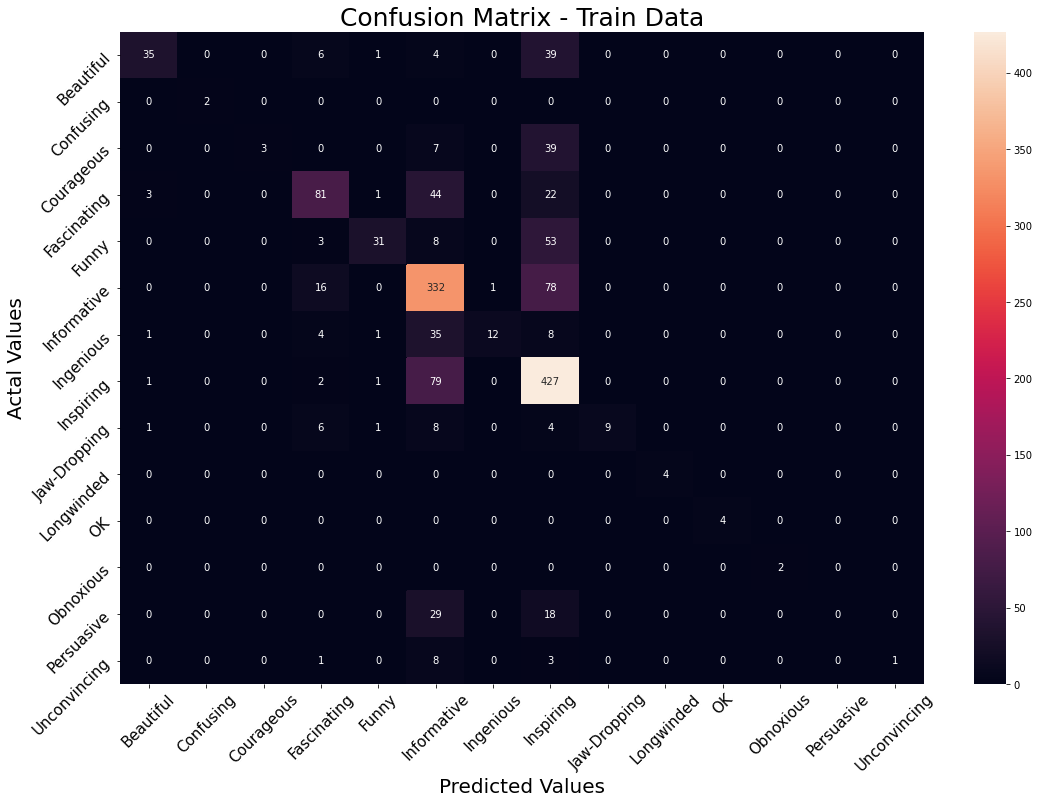

In [71]:
# Summarize the total count by Primary Rating column, in descending order
print("Total (Actual) Count by Rating Category:\n")
print(cm_counts_train.sum(axis = 1).sort_values(ascending = False)) # Axis of 1 to sum up rows for Actual values

# Plotting the confusion matrix
plt.figure(figsize = (18, 12))
sns.heatmap(cm_counts_train, annot = True, fmt = '1g')

# Update Title and Axes
plt.title('Confusion Matrix - Train Data', fontdict = {'fontsize': 25})
plt.ylabel('Actal Values', fontdict = {'fontsize': 20})
plt.xlabel('Predicted Values', fontdict = {'fontsize': 20})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(rotation = 45, fontsize = 15);

For the **large majority of Primary Ratings predicted vs. actually assigned**, the correct Primary Rating classification has occurred.  The main issues occurred in the following predictions:
- **Predicted Informative (79)** vs. Inspiring Actual Rating
- **Predicted Inspiring (78)** vs. Informative Actual Rating
- **Predicted Inspiring (53)** vs. Funny Actual Rating

One caveat to mention is that these **ratings are all somewhat related**, or rather are not opposites.
- Funny or informative talks **could all be similarly categorized as inspiring, depending on user preference**

#### Validation Data

In [66]:
# Predict on the Top Model against Validation dataset
predicted_val = nb_clf.predict(X_val)

In [69]:
# Create Confusion Matrix of Actual Primary Rating results vs. Predicted Ratings
cm_counts_val = confusion_matrix(y_val, predicted_val)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_counts_val= pd.DataFrame(cm_counts_val,
                     index = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative',
                              'Ingenious', 'Inspiring', 'Jaw-Dropping', 'Longwinded', 'OK',
                              'Persuasive', 'Unconvincing'], 
                     columns = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative',
                              'Ingenious', 'Inspiring', 'Jaw-Dropping', 'Longwinded', 'OK',
                              'Persuasive', 'Unconvincing'])

Total (Actual) Count by Rating Category:

Inspiring       170
Informative     142
Fascinating      50
Funny            32
Beautiful        29
Ingenious        20
Courageous       17
Persuasive       16
Jaw-Dropping     10
Unconvincing      5
Longwinded        2
OK                1
dtype: int64


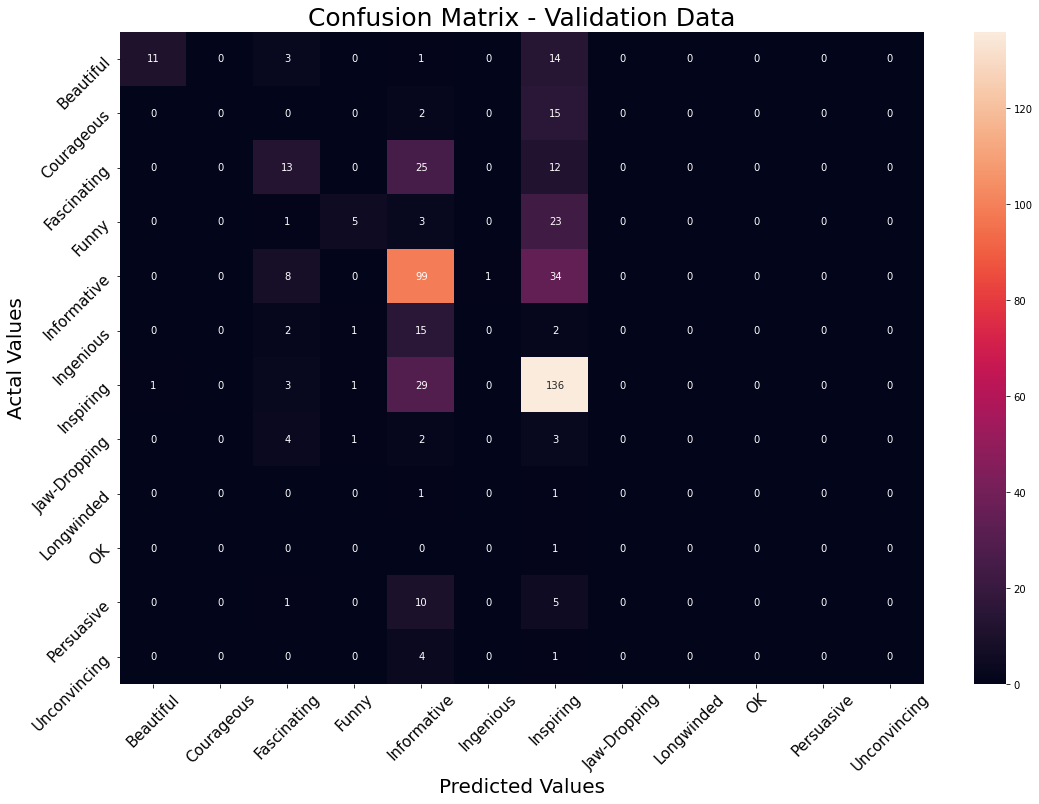

In [72]:
# Summarize the total count by Primary Rating column, in descending order
print("Total (Actual) Count by Rating Category:\n")
print(cm_counts_val.sum(axis = 1).sort_values(ascending = False)) # Axis of 1 to sum up rows for Actual values

# Plotting the confusion matrix
plt.figure(figsize = (18, 12))
sns.heatmap(cm_counts_val, annot = True, fmt = '1g')

# Update Title and Axes
plt.title('Confusion Matrix - Validation Data', fontdict = {'fontsize': 25})
plt.ylabel('Actal Values', fontdict = {'fontsize': 20})
plt.xlabel('Predicted Values', fontdict = {'fontsize': 20})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(rotation = 45, fontsize = 15);

For the **large majority of Primary Ratings predicted vs. actually assigned**, the correct Primary Rating classification has occurred.  The main issues occurred in the following predictions:
- **Predicted Inspiring (34)** vs. Informative Actual Rating
- **Predicted Informative (29)** vs. Inspiring Actual Rating
- **Predicted Inspiring (23)** vs. Funny Actual Rating

One caveat to mention is that these **ratings are all somewhat related**, or rather are not opposites.
- Funny or informative talks **could all be similarly categorized as inspiring, depending on user preference**

#### Test Data

In [67]:
# Predict on the Top Model against Validation dataset
predicted_test = nb_clf.predict(X_test)

In [70]:
# Create Confusion Matrix of Actual Primary Rating results vs. Predicted Ratings
cm_counts_test = confusion_matrix(y_test, predicted_test)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_counts_test = pd.DataFrame(cm_counts_test,
                     index = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative',
                              'Ingenious', 'Inspiring', 'Jaw-Dropping', 'Longwinded', 'OK',
                              'Obnoxious', 'Persuasive', 'Unconvincing'], 
                     columns = ['Beautiful', 'Courageous', 'Fascinating', 'Funny', 'Informative',
                               'Ingenious', 'Inspiring', 'Jaw-Dropping', 'Longwinded', 'OK',
                               'Obnoxious', 'Persuasive', 'Unconvincing'])

Total (Actual) Count by Rating Category:

Inspiring       170
Informative     143
Fascinating      50
Funny            32
Beautiful        28
Ingenious        20
Persuasive       16
Courageous       16
Jaw-Dropping     10
Unconvincing      5
Longwinded        2
Obnoxious         1
OK                1
dtype: int64


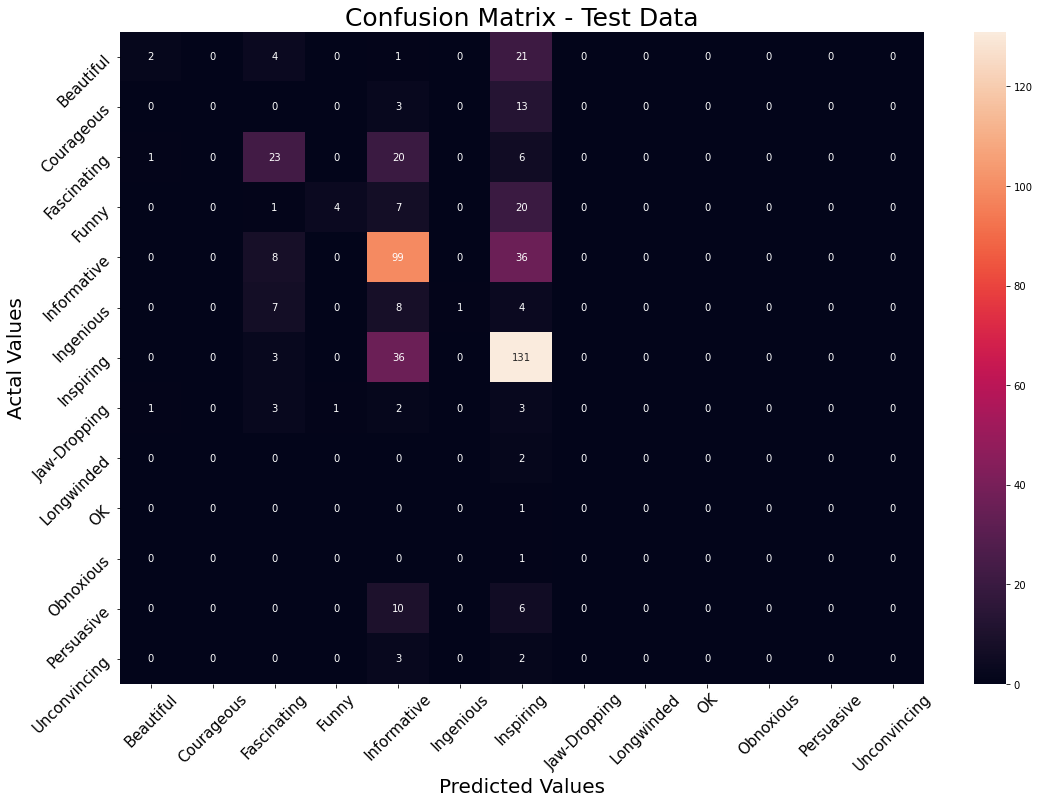

In [73]:
# Summarize the total count by Primary Rating column, in descending order
print("Total (Actual) Count by Rating Category:\n")
print(cm_counts_test.sum(axis = 1).sort_values(ascending = False)) # Axis of 1 to sum up rows for Actual values

# Plotting the confusion matrix
plt.figure(figsize = (18, 12))
sns.heatmap(cm_counts_test, annot = True, fmt = '1g')

# Update Title and Axes
plt.title('Confusion Matrix - Test Data', fontdict = {'fontsize': 25})
plt.ylabel('Actal Values', fontdict = {'fontsize': 20})
plt.xlabel('Predicted Values', fontdict = {'fontsize': 20})

# Adjust Axis Rotations & Sizes
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(rotation = 45, fontsize = 15);

For the **large majority of Primary Ratings predicted vs. actually assigned**, the correct Primary Rating classification has occurred.  The main issues occurred in the following predictions:
- **Predicted Inspiring (36)** vs. Informative Actual Rating
- **Predicted Informative (36)** vs. Inspiring Actual Rating
- **Predicted Inspiring (21)** vs. Beautiful Actual Rating

One caveat to mention is that these **ratings are all somewhat related**, or rather are not opposites.
- Beautiful or informative talks **could all be similarly categorized as inspiring, depending on user preference**

### Classification Report

#### Train Data

In [88]:
# Create and print out a Classification Report for Model results
cm_class_train = classification_report(y_train, predicted_train)
print(cm_class_train)

              precision    recall  f1-score   support

   Beautiful       0.85      0.41      0.56        85
   Confusing       1.00      1.00      1.00         2
  Courageous       1.00      0.06      0.12        49
 Fascinating       0.68      0.54      0.60       151
       Funny       0.86      0.33      0.47        95
 Informative       0.60      0.78      0.68       427
   Ingenious       0.92      0.20      0.32        61
   Inspiring       0.62      0.84      0.71       510
Jaw-Dropping       1.00      0.31      0.47        29
  Longwinded       1.00      1.00      1.00         4
          OK       1.00      1.00      1.00         4
   Obnoxious       1.00      1.00      1.00         2
  Persuasive       0.00      0.00      0.00        47
Unconvincing       1.00      0.08      0.14        13

    accuracy                           0.64      1479
   macro avg       0.82      0.54      0.58      1479
weighted avg       0.67      0.64      0.60      1479



TED Talks rated as **Informative or Inspiring, followed by Beautiful**, scored the highest for Precision and Recall, and appear to be the most prevalent Actual ratings (Support) and easiest to predict for.
- Those Ratings showing Precision and Recall scores of 100% are due to **very low Actual Ratings correctly predicted (low Support numbers)**
    - Conversely, scores of 0% show cases where **no Actual Rating for a given category occurred in the dataset**

#### Validation Data

In [89]:
# Create and print out a Classification Report for Model results
cm_class_val = classification_report(y_val, predicted_val)
print(cm_class_val)

              precision    recall  f1-score   support

   Beautiful       0.92      0.38      0.54        29
  Courageous       0.00      0.00      0.00        17
 Fascinating       0.37      0.26      0.31        50
       Funny       0.62      0.16      0.25        32
 Informative       0.52      0.70      0.59       142
   Ingenious       0.00      0.00      0.00        20
   Inspiring       0.55      0.80      0.65       170
Jaw-Dropping       0.00      0.00      0.00        10
  Longwinded       0.00      0.00      0.00         2
          OK       0.00      0.00      0.00         1
  Persuasive       0.00      0.00      0.00        16
Unconvincing       0.00      0.00      0.00         5

    accuracy                           0.53       494
   macro avg       0.25      0.19      0.19       494
weighted avg       0.47      0.53      0.47       494



TED Talks rated as **Inspiring, Informative, or Beautiful, scored the highest for Precision and Recall**, and appear to be the most prevalent Actual ratings (Support) and easiest to predict for.

#### Test Data

In [90]:
# Create and print out a Classification Report for Model results
cm_class_test = classification_report(y_test, predicted_test)
print(cm_class_test)

              precision    recall  f1-score   support

   Beautiful       0.50      0.07      0.12        28
  Courageous       0.00      0.00      0.00        16
 Fascinating       0.47      0.46      0.46        50
       Funny       0.80      0.12      0.22        32
 Informative       0.52      0.69      0.60       143
   Ingenious       1.00      0.05      0.10        20
   Inspiring       0.53      0.77      0.63       170
Jaw-Dropping       0.00      0.00      0.00        10
  Longwinded       0.00      0.00      0.00         2
          OK       0.00      0.00      0.00         1
   Obnoxious       0.00      0.00      0.00         1
  Persuasive       0.00      0.00      0.00        16
Unconvincing       0.00      0.00      0.00         5

    accuracy                           0.53       494
   macro avg       0.29      0.17      0.16       494
weighted avg       0.50      0.53      0.46       494



TED Talks rated as **Inspiring or Informative, followed by Fascinating**, scored the highest for Precision and Recall, and appear to be the most prevalent Actual ratings (Support) and easiest to predict for.